In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/grocery-sales/Supermart_Grocery_Sales.csv


# The dataset contains data about grocery sales in the state of Tamilnadu across different regions. The data consists of columns - Name, Category, Sub-category, City, Order-Date, Region, Sales, Discount, Profit
## The KPI that will be used to generate insights from this data is Profit and Sales

In [26]:
grocery = pd.read_csv("/kaggle/input/grocery-sales/Supermart_Grocery_Sales.csv")
grocery

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [27]:
grocery['State'].unique()

array(['Tamil Nadu'], dtype=object)

#### It could be noticed that the columns - Order ID and State doesn't provide any value for our analysis. The reason is because only one state is listed in the dataset - Tamilnadu. Hence we will drop those columns

In [28]:
grocery.drop(['Order ID', 'State'], axis=1, inplace=True)
grocery

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit
0,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28
1,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80
2,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60
4,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45
...,...,...,...,...,...,...,...,...,...
9989,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10
9990,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70
9991,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44
9992,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24


In [29]:
grocery['Order Date'].unique()

array(['11-08-2017', '06-12-2017', '10-11-2016', ..., '3/16/2015',
       '8/29/2016', '04-06-2017'], dtype=object)

#### It could be seen that the formats of the dates in the dataset is different in few rows. To solve the issue, let's replace the separators and make them unique

In [30]:
grocery['Order Date'] = grocery['Order Date'].str.replace('/', '-')
grocery

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit
0,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28
1,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80
2,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60
4,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45
...,...,...,...,...,...,...,...,...,...
9989,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12-24-2015,West,945,0.16,359.10
9990,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70
9991,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44
9992,Peer,Oil & Masala,Spices,Pudukottai,10-16-2018,West,1659,0.15,597.24


In [31]:
grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer Name  9994 non-null   object 
 1   Category       9994 non-null   object 
 2   Sub Category   9994 non-null   object 
 3   City           9994 non-null   object 
 4   Order Date     9994 non-null   object 
 5   Region         9994 non-null   object 
 6   Sales          9994 non-null   int64  
 7   Discount       9994 non-null   float64
 8   Profit         9994 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 702.8+ KB


#### The column - Order Date is in object type while it should be of date type. One way to convert it is using pd.to_datetime() function

In [33]:
grocery['Order Date'] = pd.to_datetime(grocery['Order Date'])
grocery

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit
0,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28
1,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80
2,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60
4,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45
...,...,...,...,...,...,...,...,...,...
9989,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10
9990,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70
9991,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44
9992,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24


In [34]:
grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Customer Name  9994 non-null   object        
 1   Category       9994 non-null   object        
 2   Sub Category   9994 non-null   object        
 3   City           9994 non-null   object        
 4   Order Date     9994 non-null   datetime64[ns]
 5   Region         9994 non-null   object        
 6   Sales          9994 non-null   int64         
 7   Discount       9994 non-null   float64       
 8   Profit         9994 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 702.8+ KB


#### A new column - Order Day to depict on which day of the week is order took place is created

In [35]:
grocery['Order Day'] = grocery['Order Date'].dt.day_name()
grocery

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,Order Day
0,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Wednesday
1,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Wednesday
2,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Monday
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tuesday
4,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tuesday
...,...,...,...,...,...,...,...,...,...,...
9989,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,Thursday
9990,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Sunday
9991,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tuesday
9992,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,Tuesday


In [36]:
grocery['Category'].nunique()

7

In [37]:
grocery['Category'].unique()

array(['Oil & Masala', 'Beverages', 'Food Grains', 'Fruits & Veggies',
       'Bakery', 'Snacks', 'Eggs, Meat & Fish'], dtype=object)

In [38]:
grocery['Sub Category'].nunique()

23

In [39]:
grocery['Sub Category'].unique()

array(['Masalas', 'Health Drinks', 'Atta & Flour', 'Fresh Vegetables',
       'Organic Staples', 'Fresh Fruits', 'Biscuits', 'Cakes',
       'Chocolates', 'Eggs', 'Cookies', 'Chicken', 'Edible Oil & Ghee',
       'Mutton', 'Soft Drinks', 'Dals & Pulses', 'Organic Vegetables',
       'Noodles', 'Organic Fruits', 'Fish', 'Spices', 'Rice',
       'Breads & Buns'], dtype=object)

In [40]:
grocery['City'].unique()

array(['Vellore', 'Krishnagiri', 'Perambalur', 'Dharmapuri', 'Ooty',
       'Trichy', 'Ramanadhapuram', 'Tirunelveli', 'Chennai', 'Karur',
       'Namakkal', 'Dindigul', 'Kanyakumari', 'Bodi', 'Tenkasi',
       'Viluppuram', 'Madurai', 'Salem', 'Cumbum', 'Nagercoil',
       'Pudukottai', 'Theni', 'Coimbatore', 'Virudhunagar'], dtype=object)

In [41]:
grocery['Region'].unique()

array(['North', 'South', 'West', 'Central', 'East'], dtype=object)

In [77]:
grocery['Region'] = grocery['Region'].replace('North', 'Central')

In [78]:
grocery['Region'].unique()

array(['Central', 'South', 'West', 'East'], dtype=object)

In [42]:
grocery.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


#### The Discount column has values from 0.10 to 0.35 which are fractions of percentage. They are to be converted into percentage for better understanding and deriving insights from the dataset

In [43]:
grocery['Discount'] = grocery['Discount'] * 100
grocery.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,22.681709,374.937082
std,577.559036,7.463595,239.932881
min,500.000000,10.000000,25.250000
25%,1000.000000,16.000000,180.022500
50%,1498.000000,23.000000,320.780000
75%,1994.750000,29.000000,525.627500
max,2500.000000,35.000000,1120.950000


In [44]:
grocery

,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,Order Day
0,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,12.0,401.28,Wednesday
1,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,18.0,149.80,Wednesday
2,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,21.0,165.20,Monday
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,25.0,89.60,Tuesday
4,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,26.0,918.45,Tuesday
...,...,...,...,...,...,...,...,...,...,...
9989,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,16.0,359.10,Thursday
9990,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,26.0,71.70,Sunday
9991,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,16.0,501.44,Tuesday
9992,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,15.0,597.24,Tuesday


#### The data seems to be cleaned and ready for analysis. 

## 1. Which category has highest sales and making good profits?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


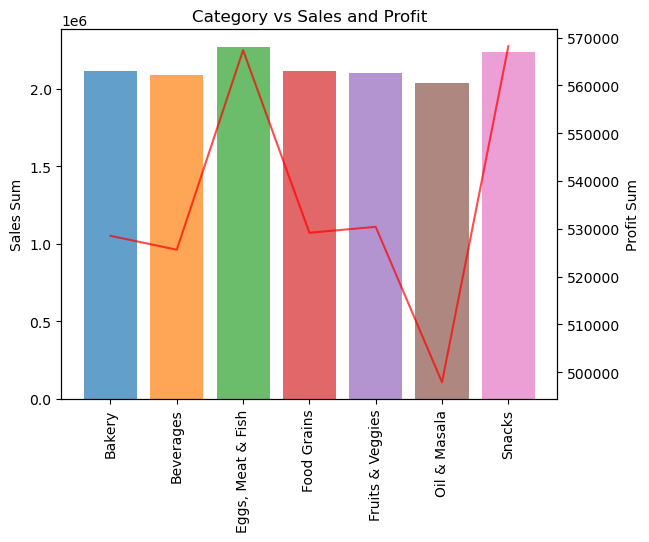

In [55]:
import matplotlib.pyplot as plt

category_sales_profit = grocery.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'})

# Create the figure and axis objects
fig, ax1 = plt.subplots()

# Define the colors for each category
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']

# Create the bar plot for 'Sales'
ax1.bar(category_sales_profit.index, category_sales_profit['Sales'], color=colors, alpha=0.7, label='Sales')

# Set the y-axis label for 'Sales'
ax1.set_ylabel('Sales Sum')

# Create the line plot for 'Profit' on a secondary axis
ax2 = ax1.twinx()
ax2.plot(category_sales_profit.index, category_sales_profit['Profit'], color='red', alpha=0.7, label='Profit')

# Set the y-axis label for 'Profit'
ax2.set_ylabel('Profit Sum')

ax1.set_xticklabels(category_sales_profit.index, rotation=90)

# Set the plot title and legend
plt.title('Category vs Sales and Profit')

# Show the plot
plt.show()

#### From the above graph, the categories which has higher sales are making higher profits. The categories are - 'Eggs, Meat & Fish' and Snacks which are making profits with maximum sales. While 'Oil & Masala' having the lowest sales as well as minimum profit among the lot

## 2. Which subcategory from each category has highest sales and profits?

In [70]:
# Get the subcategory with the highest sales and profit for each category
category_subcategory_sales_max = grocery.groupby(['Category', 'Sub Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index().sort_values(['Category', 'Sales', 'Profit'], ascending=[True, False, False]).drop_duplicates('Category')

category_subcategory_sales_max

,Category,Sub Category,Sales,Profit
1,Bakery,Breads & Buns,742586,190764.98
3,Beverages,Health Drinks,1051439,267469.79
8,"Eggs, Meat & Fish",Mutton,611200,151389.40
11,Food Grains,Organic Staples,558929,144136.89
13,Fruits & Veggies,Fresh Fruits,551212,134668.35
18,Oil & Masala,Masalas,697480,168999.11
21,Snacks,Cookies,768213,190643.70


## 3. How much is each region contributing in total sales in the state?

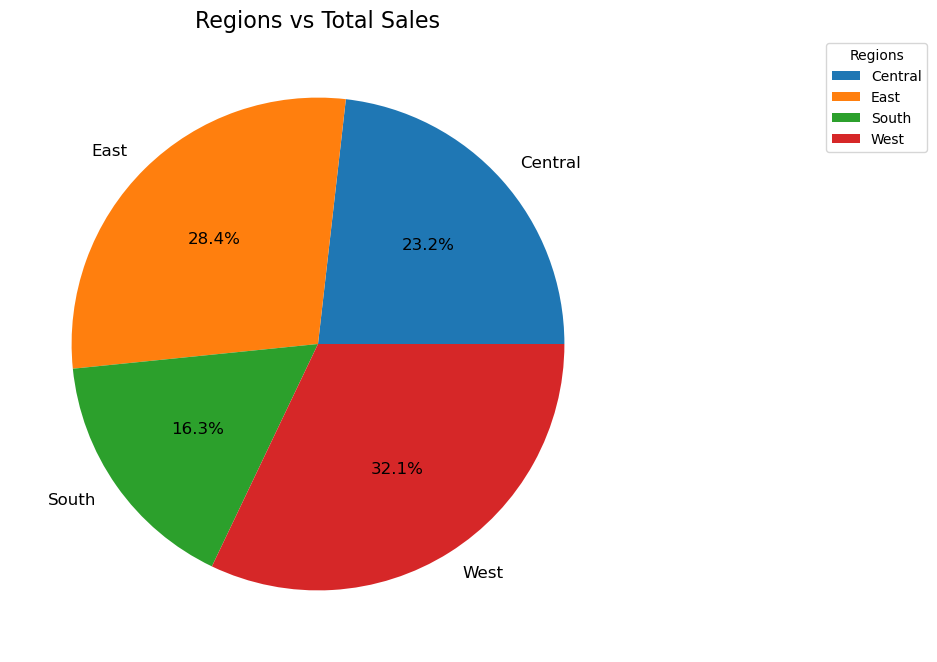

In [79]:
region_sales = grocery.groupby('Region')['Sales'].sum()

# Create a pie chart of Regions vs total sales
plt.figure(figsize=(8,8))
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title('Regions vs Total Sales', fontsize=16)
plt.legend(title='Regions', loc='best', bbox_to_anchor=(1, 0.5, 0.5, 0.5))
plt.show()

#### The East and West regions are dominating in terms of the total sales

## 4. Which city is producing having profits?

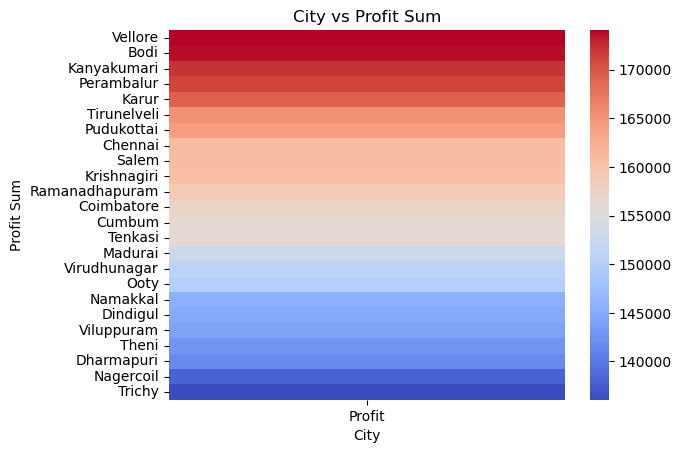

In [88]:
import seaborn as sns

city_profit = grocery.groupby('City')['Profit'].sum()

# Sort the cities by profit sum in descending order
city_profit = city_profit.sort_values(ascending=False)

# Create a pivot table of city vs profit sum
city_profit_pivot = pd.pivot_table(grocery, values='Profit', index='City', aggfunc='sum')

# Reindex the pivot table using the sorted cities
city_profit_pivot = city_profit_pivot.reindex(city_profit.index)

# Create a heatmap of the pivot table
sns.heatmap(city_profit_pivot, cmap='coolwarm')

# Set the title and axis labels
plt.title('City vs Profit Sum')
plt.xlabel('City')
plt.ylabel('Profit Sum')

# Show the plot
plt.show()

#### Cities like Vellore, Bodi, Kanyakumari etc are producing highest profits from the grocery sales

## 5. On which day, more sales are happening?

Text(0, 0.5, 'Average Sales')

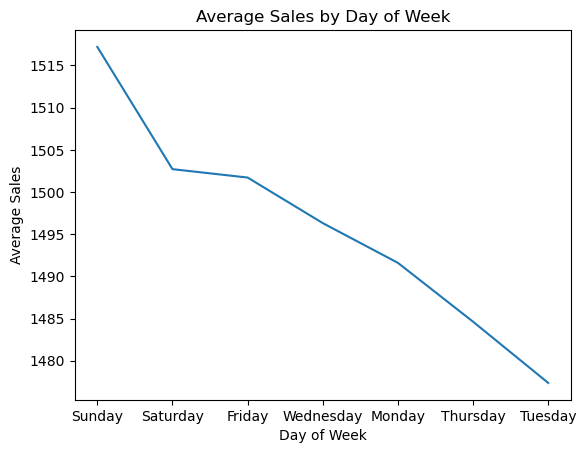

In [91]:
avg_sales_by_day = grocery.groupby('Order Day')['Sales'].mean().reset_index()

# Sort the data by average sales in descending order
avg_sales_by_day = avg_sales_by_day.sort_values(by='Sales', ascending=False)

# Create a line plot of the average sales by day of the week
sns.lineplot(data=avg_sales_by_day, x='Order Day', y='Sales')

# Set the title and axis labels
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')

#### People tend to purchase sales more during the weekends from Friday till Sunday while Weekdays like Thursday and Tuesday has lower mean sales

## 6. Checking whether the discount rates have any impact on number of sales?

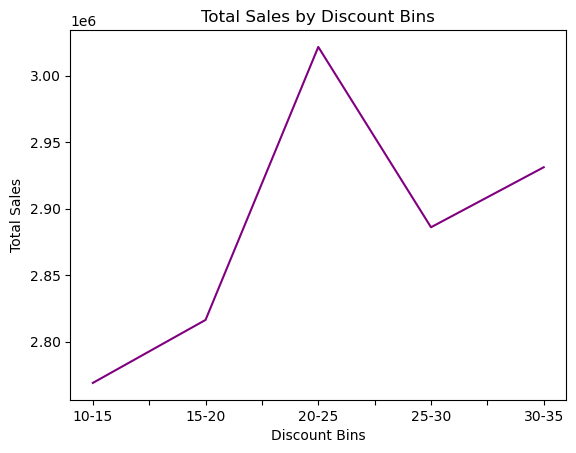

In [96]:
bins = [10, 15, 20, 25, 30, 35]

# Create a new column with bin labels
labels = ['10-15', '15-20', '20-25', '25-30', '30-35']
grocery['Discount Bin'] = pd.cut(grocery['Discount'], bins=bins, labels=labels)

# Group the data by discount bins and calculate the total sales in each bin
sales_by_discount = grocery.groupby('Discount Bin')['Sales'].sum()

# Create a bar plot to show the relationship between discount bins and total sales
sales_by_discount.plot(kind='line', color='purple')

# Set the chart title and axes labels
plt.title('Total Sales by Discount Bins')
plt.xlabel('Discount Bins')
plt.ylabel('Total Sales')

# Display the plot
plt.show()

#### The discount rate seems to be affecting the number of sales. Though not linearly increasing till the higher discount rates, sales were comparatively higher from 20-35% than 10-20%